<a href="https://colab.research.google.com/github/hungpham13/Vietnamese-HTR/blob/main/V_HTR_Colab_runtime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hungpham13/Vietnamese-HTR.git
%cd Vietnamese-HTR/
!pip install -r requirements.txt

Cloning into 'Vietnamese-HTR'...
remote: Enumerating objects: 4984, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (75/75), done.
remote: Total 4984 (delta 66), reused 135 (delta 56), pack-reused 4839
Receiving objects: 100% (4984/4984), 511.52 MiB | 41.39 MiB/s, done.
Resolving deltas: 100% (85/85), done.
Checking out files: 100% (4800/4800), done.
/content/Vietnamese-HTR
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 584 kB 5.3 MB/s 
     |████████████████████████████████| 409 kB 45.3 MB/s 
     |████████████████████████████████| 140 kB 57.9 MB/s 
     |████████████████████████████████| 596 kB 56.8 MB/s 
     |████████████████████████████████| 1.1 MB 60.8 MB/s 
     |████████████████████████████████| 144 kB 73.2 MB/s 
     |████████████████████████████████| 271 kB 59.9 MB/s 
     |████████████████████████████████| 94 kB 4.6 MB/s 
  Attempting uninstall:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Test vocab tokenizer

In [ ]:
from preprocessing.vocab import Vocab
vocab = Vocab()
e = vocab.encode("Ngách 71D, ngõ 32, đường Nguyễn Cơ Thạch, phường Mỹ Đình, quận Nam Từ Liêm, Hà Nội, Việt Nam")
print(e)
vocab.decode(e)

[1, 99, 74, 12, 42, 76, 232, 197, 191, 45, 211, 232, 98, 74, 106, 232, 193, 192, 211, 232, 46, 158, 126, 98, 74, 232, 99, 74, 146, 176, 66, 98, 232, 43, 124, 232, 145, 76, 14, 42, 76, 211, 232, 136, 76, 158, 126, 98, 74, 232, 97, 182, 232, 47, 80, 98, 76, 211, 232, 138, 146, 38, 98, 232, 99, 4, 96, 232, 145, 160, 232, 95, 78, 60, 96, 211, 232, 77, 6, 232, 99, 122, 78, 211, 232, 171, 78, 70, 144, 232, 99, 4, 96, 2]


'Ngách 71D, ngõ 32, đường Nguyễn Cơ Thạch, phường Mỹ Đình, quận Nam Từ Liêm, Hà Nội, Việt Nam'

In [ ]:
from preprocessing.loader import create_train_test_loader

data_dir = "data/Data 1: Handwriting OCR for Vietnamese Address/"
train_dir = data_dir + "0916_Data Samples 2/"
test_dir = data_dir + "1015_Private Test/"
train_pre_dir = data_dir+"train_preprocessed/"
test_pre_dir = data_dir+"test_preprocessed/"

batch_size = 4

train_loader, test_loader = create_train_test_loader(train_pre_dir, test_pre_dir, batch_size)

In [ ]:
batch = next(iter(train_loader))
batch['img'].shape

torch.Size([4, 3, 50, 900])

In [ ]:
import torch
a = torch.randn(4,3,6).log_softmax(2)
a = torch.max(a,-1).indices

[Vocab().decode(out.tolist()) for out in batch['tgt_output']]



['Số 253 đường Trần Phú, Thị trấn Nam Sách, Huyện Nam Sách, Hải Dương',
 'Số 289 Đinh Bộ Lĩnh, Phường 26, Quận Bình Thạnh, TP Hồ Chí Minh',
 'Số 246E/2, Khu phố 1B, Phường An Phú, Tx Thuận An, Bình Dương',
 '42 Đặng Thị Nhu, Phường Nguyễn Thái Bình, Quận 1, TP Hồ Chí Minh']

batch:
- image
- tgt_input: pad 0 cho đủ max len, chuyển vị trên cả batch, mask ngẫu nhiên token
- tgt_output: pad 0, không chuyển vị như tgt_input, khoong mask token

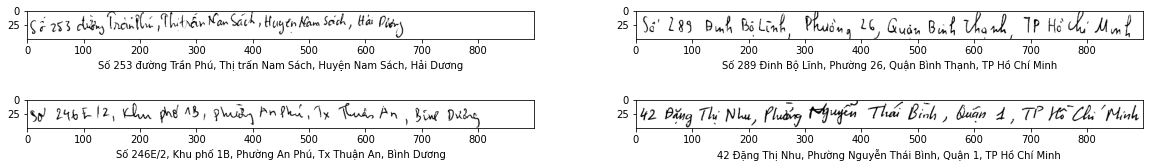

In [ ]:
from tool.visualize import plot_class_instance

plot_class_instance(train_loader)

#MODEL
- Attention-based seq2seq
- Transformer

CNN Bacbone
- Resnet50

In [ ]:
from model.trainer import train_transformer
resnet_args = {'input_channel':1,'output_channel':256}
transformer_args = {'d_model': 256, 
                    'dim_feedforward': 2048, 
                    'max_seq_length': 1024, #max length of positional encoder
                    'nhead': 8, 
                    'num_decoder_layers': 6, 
                    'num_encoder_layers': 6, 
                    'pos_dropout': 0.1, #positional encoder dropout
                    'trans_dropout': 0.1, #transformer dropout
                    }

# Training
from scratch

In [3]:
!nvidia-smi

Mon May 30 06:02:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from train import train

data_dir = "data/"
train_dir = data_dir + "0916_Data_Samples_2/"
test_dir = data_dir + "1015_Private_Test/"
train_pre_dir = data_dir + "train_preprocessed/"
test_pre_dir = data_dir + "test_preprocessed/"

config = {"batch_size": 32, 
          "max_epochs": 127, 
          "model_name": "crnn", 
          "train_dir": train_dir, 
          "test_dir": test_dir, 
          "checkpoint_path": "../drive/MyDrive/saved_models",
          "model_params": {"optimizer_hparams": {"lr":1e-3}, 
                           },
            }
model, result = train(**config)

Global seed set to 42
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/callback_connector.py:97: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=1)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  f"Setting `Trainer(progress_bar_refresh_rate={progress_bar_refresh_rate})` is deprecated in v1.5 and"
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: ../drive/MyDrive/saved_models/crnn/lightning_logs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type          | Params
--------------------------------------------
0 | cnn       | BaseCNN       | 9.2 M 
1 | seq       | BRNN          | 4.3

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/data.py:73: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 32. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Training: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/data.py:73: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 31. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/data.py:73: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 5. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
model

test model flow

In [ ]:
from model.crnn import CRNN
from torchinfo import summary
a = CRNN({'lr':1e-3})
summary(a, (4,3,118,2202))

torch.Size([4, 244, 1024])
torch.Size([4, 244, 512])


Layer (type:depth-idx)                   Output Shape              Param #
CRNN                                     --                        --
├─BaseCNN: 1-1                           [4, 1024, 244]            --
│    └─Sequential: 2-1                   [4, 256, 13, 244]         --
│    │    └─Conv2d: 3-1                  [4, 64, 118, 2202]        1,792
│    │    └─ReLU: 3-2                    [4, 64, 118, 2202]        --
│    │    └─MaxPool2d: 3-3               [4, 64, 39, 734]          --
│    │    └─Conv2d: 3-4                  [4, 128, 39, 734]         73,856
│    │    └─ReLU: 3-5                    [4, 128, 39, 734]         --
│    │    └─MaxPool2d: 3-6               [4, 128, 13, 244]         --
│    │    └─Conv2d: 3-7                  [4, 256, 13, 244]         295,168
│    │    └─BatchNorm2d: 3-8             [4, 256, 13, 244]         512
│    │    └─ReLU: 3-9                    [4, 256, 13, 244]         --
│    └─Sequential: 2-2                   [4, 256, 13, 244]         --
│ 

In [ ]:
import torch
from torch import nn
# Target are to be padded
T = 50      # Input sequence length
C = 20      # Number of classes (including blank) - vocab size
N = 4       # Batch size
S = 30      # Target sequence length of longest target in batch (padding length)
S_min = 10  # Minimum target length, for demonstration purposes

# Initialize random batch of input vectors, for *size = (T,N,C)
input = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()  # (N,T,C)
# print(input)
# Initialize random batch of targets (0 = blank, 1:C = classes)
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)
print(target)
input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)
ctc_loss = nn.CTCLoss()
loss = ctc_loss(input, target, input_lengths, target_lengths)
loss.backward()

tensor([[13,  4,  2, 10, 17, 19, 14,  3, 10,  2,  1, 16, 19, 13, 15,  7, 17,  9,
         19,  5, 19, 13,  6,  1,  1,  3,  5,  4, 19,  1],
        [19,  3, 15,  3,  1,  6,  6, 10,  9,  5,  4,  3, 16,  3,  4, 16,  6,  5,
         14,  2,  8,  3,  2, 19,  9, 17,  6,  2, 18, 15],
        [13, 11,  9, 14, 13,  6, 19,  5,  2,  5,  7,  4,  8,  7, 14, 11, 12,  7,
          7,  5,  2,  4,  1,  4,  5,  6,  8, 17, 15,  2],
        [10,  2,  1,  4,  9,  8, 15, 15,  4, 17, 13,  2, 18, 18, 10,  9, 16, 11,
          5, 12,  2, 18,  9, 14, 14, 14,  9, 13, 14,  1]])


# References
VietOCR

Resnet50 implementation:
- [Resnet50 paper](https://arxiv.org/pdf/1512.03385.pdf)
- [Youtube tutorial](https://www.youtube.com/watch?v=DkNIBBBvcPs)

Transformer:
- Attention is all you need
- [Transformer tutorial - UvA blog](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial6/Transformers_and_MHAttention.html)
- [Positional encoding - Kazemnejad blog](https://kazemnejad.com/blog/transformer_architecture_positional_encoding/)